<a href="https://colab.research.google.com/github/ChalaniEkanayake/EN2550_Assignment_4/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)

K = len(np.unique(y_train))    # classes
print('Number of classes :', K)

x_train :  (50000, 32, 32, 3)
x_test :  (10000, 32, 32, 3)
Number of classes : 10


In [ ]:
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = x_train.shape[1]*x_train.shape[1]*3

print('Number of train samples :', Ntr)
print('Number of test samples :', Nte)
print('Dimension of each sample :', Din)

Number of train samples : 50000
Number of test samples : 10000
Dimension of each sample : 3072


In [ ]:
labels = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog',
         7:'horse', 8:'ship', 9:'truck'}

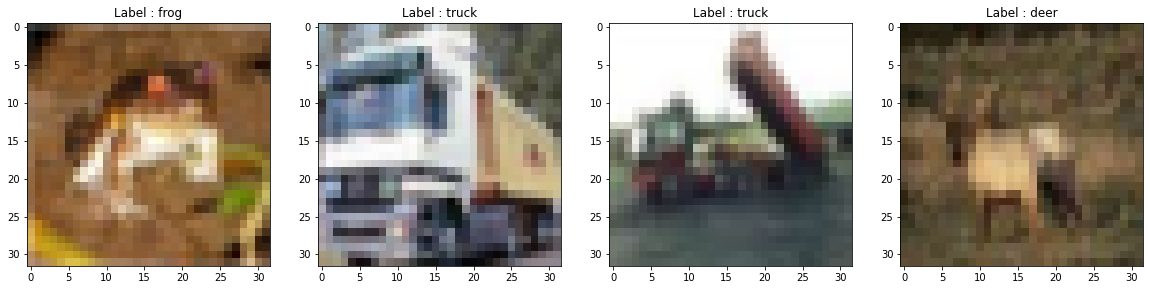

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20,20))

for i in range(0, 4):
    img = x_train[i]
    ax.ravel()[i].imshow(img)
    ax.ravel()[i].set_title("Label : {}".format(labels.get(y_train[i][0])))

In [ ]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image

In [ ]:
# like one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

print('Shape after one hot encoding :',y_train.shape)

Shape after one hot encoding : (50000, 10)


In [ ]:
x_train = np.reshape(x_train,(Ntr,Din))   #flattening
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('Shape of x_train after reshaping :', x_train.shape)

Shape of x_train after reshaping : (50000, 3072)


In [ ]:
# initializing weight and bias vectors

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
batch_size = Ntr

print("w1:", w1.shape)
print("b1:", b1.shape)
print('Batch size :', Ntr)

w1: (3072, 10)
b1: (10,)
Batch size : 50000


In [ ]:
# Bias Trick 
# Simplifies two parameters W,b into a one matrix. This way our model only has to learn one weight matrix instead of two separate matrices.
# We combine W and b into a single matrix and also add an extra column that always hold 1.

W = np.append(w1, b1.reshape(1, K), axis=0)
print('New weight matrix shape: ',W.shape)

x_train_new = np.append(x_train, np.ones((x_train.shape[0], 1)), axis=1)
x_test_new = np.append(x_test, np.ones((x_test.shape[0], 1)), axis=1)

print('Rearranged x_train: ', x_train_new.shape)

New weight matrix shape:  (3073, 10)
Rearranged x_train:  (50000, 3073)


# **Gradient Descent**

In [ ]:
iterations = 300   # epoches
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
lr_history = []
loss_history = []  
train_acc_history = [] 
val_acc_history = [] 
val_loss_history = []

m = x_train.shape[0] 

print("Running gradient descent...")

for t in range(1, iterations+1):    
  # Forward Pass
  scores = x_train_new.dot(W)
  error = scores - y_train

  loss_func = (1/(2*m))*np.sum((error)**2) + (reg/(2*m))*np.sum(W**2)
  loss_history.append(loss_func)
    
  # Backward Pass
  W = W - lr*((1/m)*(x_train_new.T.dot(error))  + (1/m)*reg*W )
    
  # get accuracies
  # to get the array of classes with highest score (column with highest value along a row), we use argmax
  pred_class = np.argmax(scores, axis=1)
  true_class = np.argmax(y_train, axis=1)    # we use the argmax function here because now y_train is a 5000x10 array after one hot encoding

  # Train set
  correct_pred = np.sum([pred_class == true_class])
  train_acc = (correct_pred/m)*100
  train_acc_history.append(train_acc)

  # Test set
  pred_class_test = np.argmax(x_test_new.dot(W), axis=1)
  true_class_test = np.argmax(y_test, axis=1)

  val_loss = 1/(x_test_new.shape[0]*2)*np.sum((x_test_new.dot(W)-y_test)**2)
  val_loss_history.append(val_loss)

  correct_pred_test = np.sum([pred_class_test == true_class_test])
  val_acc = (correct_pred_test/x_test_new.shape[0])*100
  val_acc_history.append(val_acc)
    
  # Training details
  if t == 1 or t%10 == 0:
    print("| Epoch {:04} | Loss {:.4f} | Training Acc: {:.4f} | Validation Acc: {:.4f} | Learning Rate: {:.4f} |".format(t,loss_func,train_acc,val_acc,lr))
    
  # Learning rate decay
  lr_history.append(lr)
  lr = lr*lr_decay
    
print("Gradient Descent - Done")

Running gradient descent...
| Epoch 0001 | Loss 0.5000 | Training Acc: 9.5060 | Validation Acc: 24.8700 | Learning Rate: 0.0140 |
| Epoch 0010 | Loss 0.4556 | Training Acc: 32.2520 | Validation Acc: 32.7700 | Learning Rate: 0.0139 |
| Epoch 0020 | Loss 0.4399 | Training Acc: 35.1500 | Validation Acc: 35.0400 | Learning Rate: 0.0137 |
| Epoch 0030 | Loss 0.4297 | Training Acc: 36.4820 | Validation Acc: 36.3900 | Learning Rate: 0.0136 |
| Epoch 0040 | Loss 0.4223 | Training Acc: 37.1480 | Validation Acc: 37.3200 | Learning Rate: 0.0135 |
| Epoch 0050 | Loss 0.4168 | Training Acc: 37.6600 | Validation Acc: 37.7800 | Learning Rate: 0.0133 |
| Epoch 0060 | Loss 0.4126 | Training Acc: 38.1000 | Validation Acc: 38.1700 | Learning Rate: 0.0132 |
| Epoch 0070 | Loss 0.4094 | Training Acc: 38.4560 | Validation Acc: 38.4400 | Learning Rate: 0.0131 |
| Epoch 0080 | Loss 0.4069 | Training Acc: 38.7640 | Validation Acc: 38.7200 | Learning Rate: 0.0129 |
| Epoch 0090 | Loss 0.4049 | Training Acc: 38.

## **Plotting W as images**

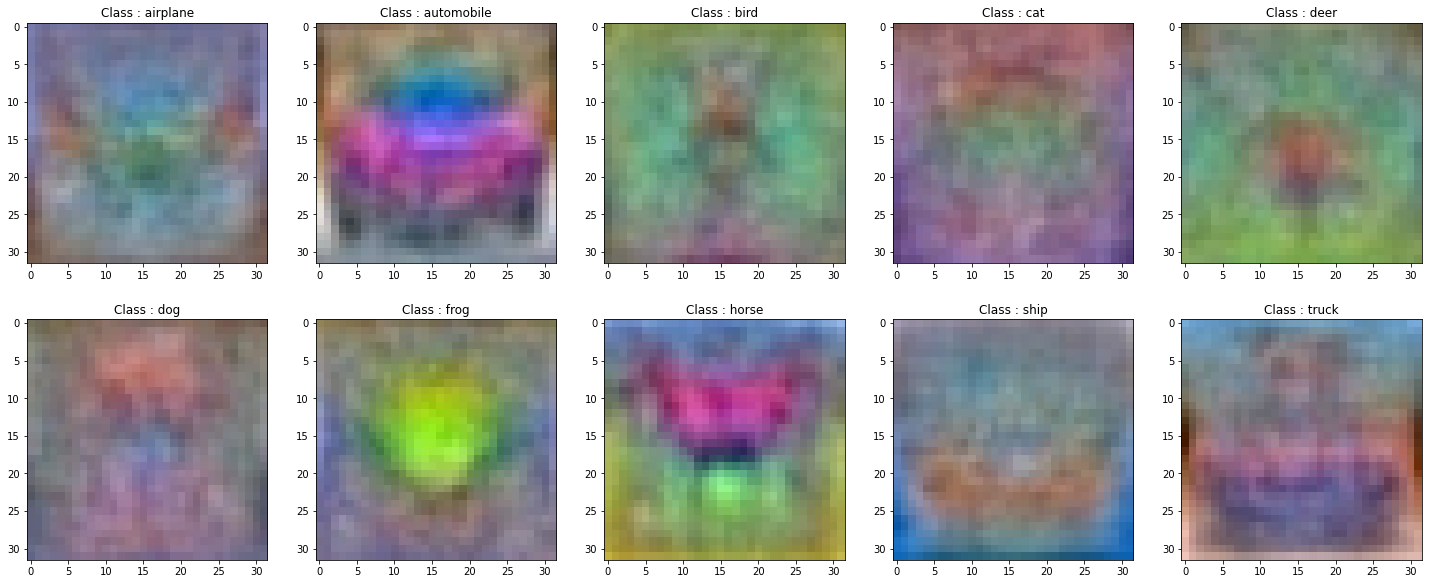

In [ ]:
W_orig = W[:-1]
W_img =  W_orig - np.min(W_orig)   # removing negative weights
images = ((W_img/np.max(W_img))*255).astype('uint8')

classes = list(labels.values())

fig, ax  = plt.subplots(2,5, figsize=(25,10))
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_title("Class : {}".format(classes[i]))
    #plt.tight_layout()

## **Plotting learning rate and accuracy curves**

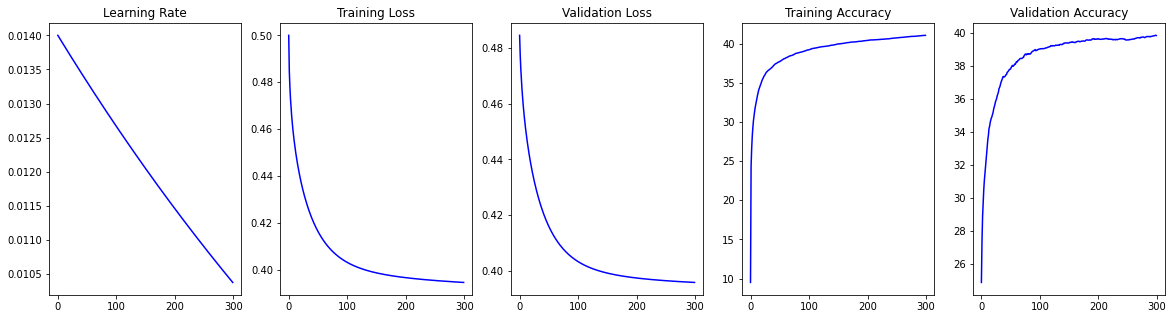

In [ ]:
fig, ax  = plt.subplots(1,5, figsize=(20,5))
items = {"Learning Rate":lr_history, "Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, 
         "Validation Accuracy": val_acc_history}
i=1
for key in items.keys():
    plt.subplot(1,5,i);
    plt.plot(items[key], color ='b')
    plt.title(key)
    i+=1

# PART 2

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

K = len(np.unique(y_train)) 

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = x_train.shape[1]*x_train.shape[1]*3

In [ ]:
#x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

In [ ]:
x_train = np.reshape(x_train,(Ntr,Din))   #flattening
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
print("x train shape : ", x_train.shape)
print("y train shape : ", y_train.shape)
print("Num of train samples : ", Ntr)
print("Num of test samples : ", Nte)
print("Num of classes : ", K)

x train shape :  (50000, 3072)
y train shape :  (50000, 10)
Num of train samples :  50000
Num of test samples :  10000
Num of classes :  10


In [ ]:
H = 200   # Hidden units
std = 1e-6

w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)

b1 = np.zeros(H)
b2 = np.zeros(K)

batch_size = Ntr
iterations = 300

lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
lr_history = []
loss_history = []  
train_acc_history = [] 
val_acc_history = [] 
val_loss_history = []

In [ ]:
print("Running Gradient Descent ...")
for t in range(1,iterations+1):
  batch_indices = np.random.choice(Ntr, batch_size)
  x = x_train[batch_indices]
  y = y_train[batch_indices]

  h = 1/(1+np.exp(-x.dot(w1)-b1))
  y_pred = h.dot(w2) + b2

  #loss = (1/(2*Ntr))*np.sum((y_pred - y)**2) + (reg/(2*Ntr))*(np.sum(w1**2) + np.sum(w2**2))
  loss = (1/(2*Ntr))*np.sum((y_pred - y)**2) + reg*(np.sum(w1**2) + np.sum(w2**2))
  loss_history.append(loss)

  # Back propagation
  dPred =  (1/Ntr)*(y_pred - y)
  dw2 = h.T.dot(dPred) + reg*w2
  db2 = dPred.sum(axis=0)

  dh = dPred.dot(w2.T)

  dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
  db1 = (dh*h*(1-h)).sum(axis =0)

  # get accuracies
  # to get the array of classes with highest score (column with highest value along a row), we use argmax
  pred_class = np.argmax(y_pred, axis=1)
  true_class = np.argmax(y, axis=1)    # we use the argmax function here because now y_train is a 5000x10 array after one hot encoding

  # Train set
  correct_pred = np.sum([pred_class == true_class])
  train_acc = (correct_pred/Ntr)*100
  train_acc_history.append(train_acc)

  # Test set
  test_h = 1/(1+np.exp(-x_test.dot(w1)-b1))
  test_pred = test_h.dot(w2) + b2
  pred_class_test = np.argmax(test_pred, axis=1)
  true_class_test = np.argmax(y_test, axis=1)

  val_loss = 1/(x_test.shape[0]*2)*np.sum((test_pred-y_test)**2)
  val_loss_history.append(val_loss)

  correct_pred_test = np.sum([pred_class_test == true_class_test])
  val_acc = (correct_pred_test/x_test.shape[0])*100
  val_acc_history.append(val_acc)

  # Training details
  if t == 1 or t%10 == 0:
    print("| Epoch {:04} | Loss {:.4f} | Training Acc: {:.4f} | Validation Acc: {:.4f} | Learning Rate: {:.4f} |".format(t,loss,train_acc,val_acc,lr))

  w1 = w1 - dw1*lr
  w2 = w2 - dw2*lr
  b1 = b1 - db1*lr
  b2 = b2 - db2*lr

  lr_history.append(lr)
  lr = lr*lr_decay

print("Gradient Descent - Done")

Running Gradient Descent ...
| Epoch 0001 | Loss 0.5000 | Training Acc: 10.3200 | Validation Acc: 10.2600 | Learning Rate: 0.0140 |
| Epoch 0010 | Loss 0.4524 | Training Acc: 10.1200 | Validation Acc: 10.0000 | Learning Rate: 0.0139 |
| Epoch 0020 | Loss 0.4303 | Training Acc: 18.9000 | Validation Acc: 18.7100 | Learning Rate: 0.0137 |
| Epoch 0030 | Loss 0.4231 | Training Acc: 26.0300 | Validation Acc: 25.6600 | Learning Rate: 0.0136 |
| Epoch 0040 | Loss 0.4167 | Training Acc: 29.6340 | Validation Acc: 28.9700 | Learning Rate: 0.0135 |
| Epoch 0050 | Loss 0.4142 | Training Acc: 30.5980 | Validation Acc: 30.2800 | Learning Rate: 0.0133 |
| Epoch 0060 | Loss 0.4103 | Training Acc: 32.8840 | Validation Acc: 32.4100 | Learning Rate: 0.0132 |
| Epoch 0070 | Loss 0.4088 | Training Acc: 32.9180 | Validation Acc: 32.6100 | Learning Rate: 0.0131 |
| Epoch 0080 | Loss 0.4058 | Training Acc: 34.6360 | Validation Acc: 34.3100 | Learning Rate: 0.0129 |
| Epoch 0090 | Loss 0.4030 | Training Acc: 3

# **Plotting Learning rate and Accuracy curves**

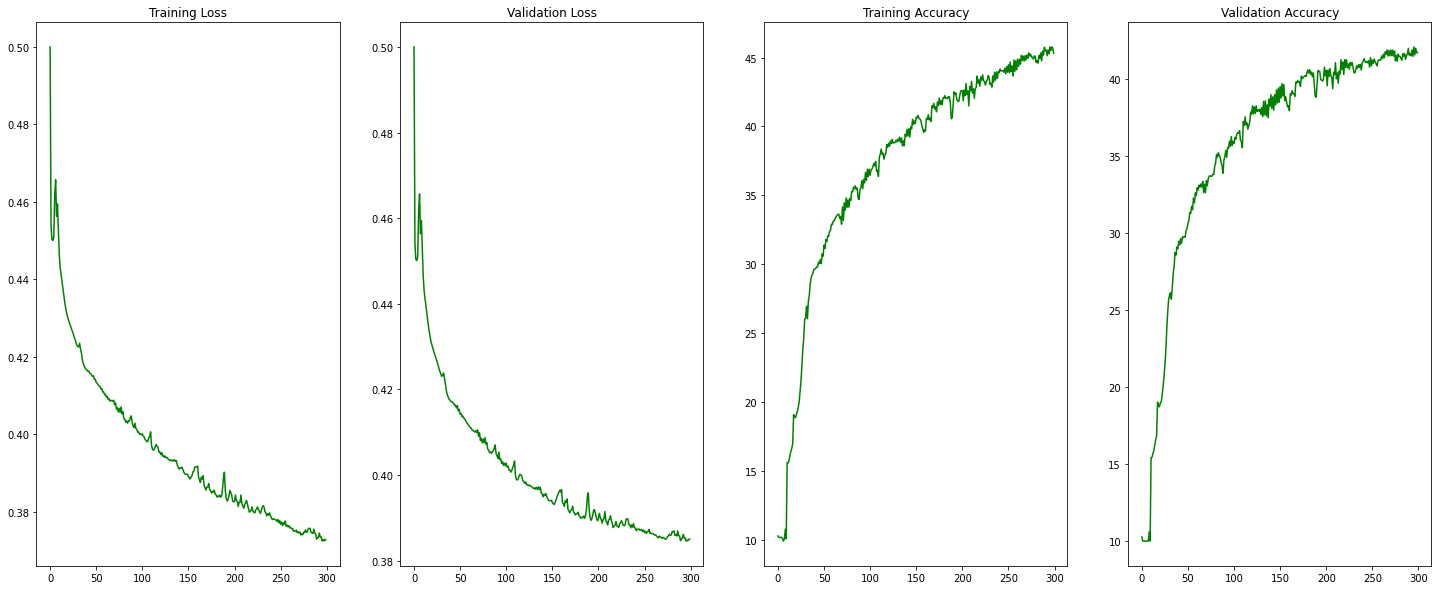

In [ ]:
fig, ax  = plt.subplots(1,4, figsize=(25,10))
items = { "Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, 
         "Validation Accuracy": val_acc_history}
i=1
for key in items.keys():
    plt.subplot(1,4,i);
    plt.plot(items[key], color ='g')
    plt.title(key)
    i+=1

# PART 3

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

K = len(np.unique(y_train)) 

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = x_train.shape[1]*x_train.shape[1]*3


#x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)


x_train = np.reshape(x_train,(Ntr,Din))   
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print("x train shape : ", x_train.shape)
print("y train shape : ", y_train.shape)
print("Num of train samples : ", Ntr)
print("Num of test samples : ", Nte)
print("Num of classes : ", K)

170500096/170498071 [==============================] - 2s 0us/step
x train shape :  (50000, 3072)
y train shape :  (50000, 10)
Num of train samples :  50000
Num of test samples :  10000
Num of classes :  10


In [3]:
H = 200   # Hidden units
std = 1e-6

w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)

b1 = np.zeros(H)
b2 = np.zeros(K)

batch_size = 500
iterations = 300

lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
lr_history = []
loss_history = []  
train_acc_history = [] 
val_acc_history = [] 
val_loss_history = []
batch_loss_history = []

In [ ]:
for t in range(1,iterations+1):

  batch_indices = np.random.choice(Ntr, Ntr)
  #x = x_train[batch_indices]
  #y = y_train[batch_indices]
  x = x_train
  y = y_train

  tot_batch_loss = 0
  for i in range(0, Ntr, batch_size):
    x_tr = x[i:i+batch_size,:]
    y_tr = y[i:i+batch_size,:]

    h = 1/(1+np.exp(-x_tr.dot(w1)-b1))
    y_pred = h.dot(w2) + b2

    batch_loss = (1/(2*Ntr))*np.sum((y_pred - y_tr)**2) + reg*(np.sum(w1**2) + np.sum(w2**2))
    batch_loss_history.append(batch_loss)

    # Back propagation
    dPred =  (1/Ntr)*(y_pred - y_tr)
    dw2 = h.T.dot(dPred) + reg*w2
    db2 = dPred.sum(axis=0)

    dh = dPred.dot(w2.T)

    dw1 = x_tr.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis =0)

    w1 = w1 - dw1*lr
    w2 = w2 - dw2*lr
    b1 = b1 - db1*lr
    b2 = b2 - db2*lr

    tot_batch_loss += batch_loss
  
  loss_history.append(tot_batch_loss)
  
  # get accuracies

  h = 1/(1+np.exp(-x.dot(w1)-b1))
  y_pred = h.dot(w2) + b2

  pred_class = np.argmax(y_pred, axis=1)
  true_class = np.argmax(y, axis=1)    

  # Train set
  correct_pred = np.sum([pred_class == true_class])
  train_acc = (correct_pred/Ntr)*100
  train_acc_history.append(train_acc)

  # Test set
  test_h = 1/(1+np.exp(-x_test.dot(w1)-b1))
  test_pred = test_h.dot(w2) + b2
  pred_class_test = np.argmax(test_pred, axis=1)
  true_class_test = np.argmax(y_test, axis=1)

  val_loss = 1/(x_test.shape[0]*2)*np.sum((test_pred-y_test)**2)
  val_loss_history.append(val_loss)

  correct_pred_test = np.sum([pred_class_test == true_class_test])
  val_acc = (correct_pred_test/x_test.shape[0])*100
  val_acc_history.append(val_acc)

  # Training details
  if t == 1 or t%10 == 0:
    print("| Epoch {:04} | Loss {:.4f} | Training Acc: {:.4f} | Validation Acc: {:.4f} | Learning Rate: {:.4f} |".format(t,tot_batch_loss,train_acc,val_acc,lr))
  
  lr_history.append(lr)
  lr = lr*lr_decay

print("--- Done ---")

| Epoch 0001 | Loss 0.4768 | Training Acc: 10.2760 | Validation Acc: 10.0000 | Learning Rate: 0.0140 |
| Epoch 0010 | Loss 0.4433 | Training Acc: 16.4360 | Validation Acc: 16.3500 | Learning Rate: 0.0139 |
| Epoch 0020 | Loss 0.4288 | Training Acc: 18.7560 | Validation Acc: 18.8000 | Learning Rate: 0.0137 |
| Epoch 0030 | Loss 0.4223 | Training Acc: 25.8700 | Validation Acc: 25.5600 | Learning Rate: 0.0136 |
| Epoch 0040 | Loss 0.4167 | Training Acc: 29.1400 | Validation Acc: 29.3200 | Learning Rate: 0.0135 |
| Epoch 0050 | Loss 0.4125 | Training Acc: 32.0440 | Validation Acc: 31.8500 | Learning Rate: 0.0133 |
| Epoch 0060 | Loss 0.4085 | Training Acc: 33.8840 | Validation Acc: 33.6000 | Learning Rate: 0.0132 |
| Epoch 0070 | Loss 0.4055 | Training Acc: 35.3820 | Validation Acc: 34.9200 | Learning Rate: 0.0131 |
| Epoch 0080 | Loss 0.4020 | Training Acc: 36.5800 | Validation Acc: 36.0300 | Learning Rate: 0.0129 |
| Epoch 0090 | Loss 0.3992 | Training Acc: 37.6980 | Validation Acc: 37.1

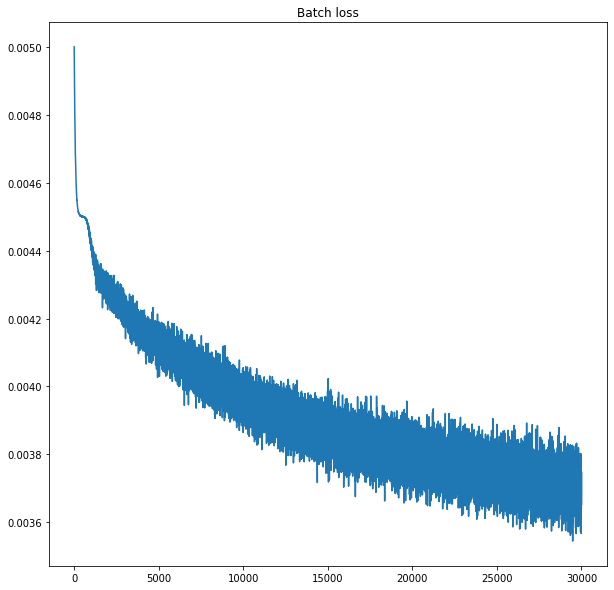

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.plot(batch_loss_history)
plt.title("Batch loss")
plt.show()

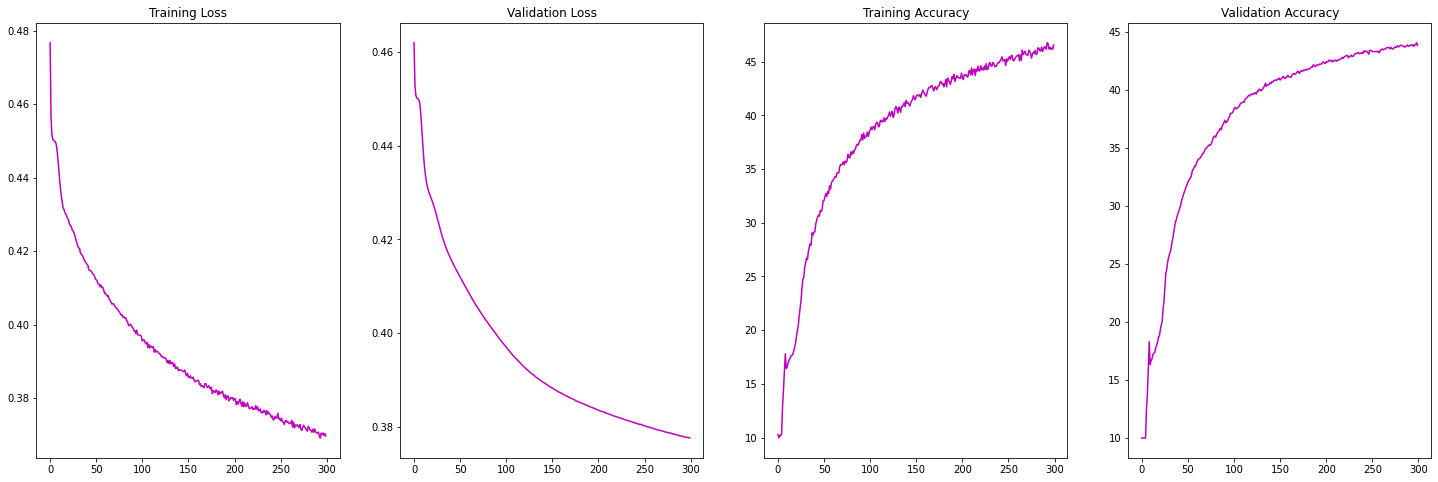

In [ ]:
fig, ax  = plt.subplots(1,4, figsize=(25,8))
items = {"Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, 
         "Validation Accuracy": val_acc_history}
i=1
for key in items.keys():
    plt.subplot(1,4,i);
    plt.plot(items[key], color ='m')
    plt.title(key)
    i+=1

# **PART 4**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

K = len(np.unique(y_train)) 

x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

print("x train shape : ", x_train.shape)
print("y train shape : ", y_train.shape)
print("Num of classes : ", K)

x train shape :  (50000, 32, 32, 3)
y train shape :  (50000, 10)
Num of classes :  10


In [10]:
batch_size = 50
num_classes = K
epochs = 10

In [13]:
model = Sequential()

# for C32 and C64, CONV => RELU => POOL 
# C32
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3), name = 'C32'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# C64
model.add(Conv2D(64, (3, 3), activation = 'relu', name = 'C64_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu', name = 'C64_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# for F64,  FLATTERN => DENSE ==> RELU

# F64
model.add(Flatten())
model.add(Dense(64, activation = 'relu', name = 'F64'))

# F10
model.add(Dense(10, activation = 'sigmoid', name  = 'F10'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C32 (Conv2D)                 (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
C64_1 (Conv2D)               (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
C64_2 (Conv2D)               (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

In [14]:
opt = keras.optimizers.SGD(lr = 1.4e-2, momentum = 0.9)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
 history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1000/1000 [==============================] - 68s 67ms/step - loss: 1.8758 - accuracy: 0.3054 - val_loss: 1.2819 - val_accuracy: 0.5310
Epoch 2/10
1000/1000 [==============================] - 67s 67ms/step - loss: 1.2543 - accuracy: 0.5512 - val_loss: 1.1894 - val_accuracy: 0.5824
Epoch 3/10
1000/1000 [==============================] - 67s 67ms/step - loss: 1.0484 - accuracy: 0.6288 - val_loss: 1.0188 - val_accuracy: 0.6454
Epoch 4/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.9304 - accuracy: 0.6701 - val_loss: 0.9269 - val_accuracy: 0.6731
Epoch 5/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.8324 - accuracy: 0.7068 - val_loss: 1.0074 - val_accuracy: 0.6569
Epoch 6/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.7524 - accuracy: 0.7359 - val_loss: 0.9238 - val_accuracy: 0.6893
Epoch 7/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.7029 - accuracy: 0.7529 - val_loss: 0.8905 -

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

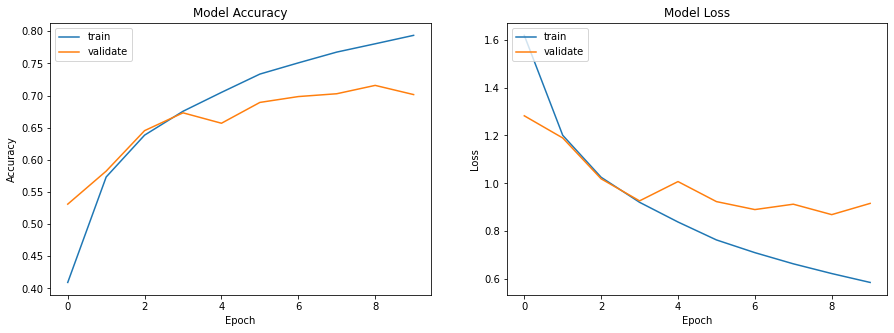

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 

# Accuracy
axs[0].plot(history.history['accuracy']) 
axs[0].plot(history.history['val_accuracy']) 

axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')

# Loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

pred = model.predict(x_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9164 - accuracy: 0.7015
Test loss: 0.9163562655448914
Test accuracy: 0.7014999985694885
